# Problems for Session 8

- Please try to do Problem 1 and Problem 2a. Problems 2b-2e are more optional, but I will provide solutions here.

In [24]:
pip install pyEdgeworthBox == 0.1.9

zsh:1: = not found
Note: you may need to restart the kernel to use updated packages.


In [25]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.optimize as opt
import pyEdgeworthBox as eb 
from scipy.optimize import fsolve, minimize, root
plt.style.use('seaborn-whitegrid')

### Problem 1: 

##### Problem 1a
Implement the generalized equilibrium model used in class, but with Cobb-Douglas utility functions rather than quasilinear utility. (As was done in class, program the first order conditions for the consumers.) Use $$ u(x_1,x_2)= 0.3 log x_1 + 0.7 log x_2 $$ Let consumer A be endowed with 2 units of each good and consumer B be endowed with
1 unit of each good. Figure out the price and the quantities consumed.

In [26]:
def constraints(arglist, endow1a, endow1b, endow2a, endow2b):
    x1a = arglist[0] 
    x1b = arglist[1] 
    p = arglist[2] 
    cons = np.zeros(3)

    # Returns quantity consumed at period 2
    x2a = endow2a + p*(endow1a-x1a)
    x2b = endow2b + p*(endow1b-x1b)

    #Returns Equilibirum First Order Condition (Utility function's FOC)
    cons[0] = (0.3/x1a) -p *0.7/x2a # f.o.c. for consumer a
    cons[1] = (0.3/x1b) -p *0.7/x2b # f.o.c. for consumer b

    #Returns Market clearance condition (I.e Warlas'condition)
    cons[2] = x1a + x1b - endow1a - endow1b
    
    return cons

#Endownments. 
endow1a = 2 
endow2a = 2 
endow1b = 1 
endow2b = 1 

res = root(constraints, np.ones(3), args=(endow1a, endow1b, endow2a, endow2b))

''' Scipy.optimize.root 
        Parameters:
            function, callable: A vector function to find a root of.
            x0, ndarray: Initial guess.
            argstuple, optional: Extra arguments passed to the objective function and its Jacobian.
        Return: 
            OptimizeResult '''

x = res['x'] #Optimal Prices. 

print(f"Optimal Price of both goods:  {x[2]:.3f}")
print(f"Quantity consumed of Good 1 by consumer A: {x[0]:.3f}, at the price")
print(f"Quantity consumed of Good 1 by consumer B: {x[1]:.3f}")
print(f"Quantity consumed of Good 2 by consumer A: {endow2a + x[2]*(endow1a-x[0]):.3f}")
print(f"Quantity consumed of Good 2 by consumer B: {endow2b + x[2]*(endow1b-x[1]):.3f}")
print(f"Market Clearing Condition of consumer A: Consumption of Good 1 is {x[0]-endow1a:.3f} units, at price {x[2]:.3f}. \n While, consumption of good 2 is {x[2]*(endow2a-x[0]):.3f} units at price 1.")
print(f"Market Clearing Condition of consumer B: Consumption of Good 1 is {x[1]-endow1b:.3f} units, at price {x[2]:.3f}. \n While, consumption of good 2 is {x[2]*(endow2b-x[0]):.3f} units at price 1.")


Optimal Price of both goods:  0.429
Quantity consumed of Good 1 by consumer A: 2.000, at the price
Quantity consumed of Good 1 by consumer B: 1.000
Quantity consumed of Good 2 by consumer A: 2.000
Quantity consumed of Good 2 by consumer B: 1.000
Market Clearing Condition of consumer A: Consumption of Good 1 is 0.000 units, at price 0.429. 
 While, consumption of good 2 is -0.000 units at price 1.
Market Clearing Condition of consumer B: Consumption of Good 1 is -0.000 units, at price 0.429. 
 While, consumption of good 2 is -0.429 units at price 1.


##### Problem 1b
Validate Walras’ law: That is, show that the market for good number 2 also clears in equilibrium, even though this market clearing condition (demand = supply) is not part of the equation system used in the solution.

- Walras' law states that the aggregate value of excess demand is zero at any set prices. In this case we are dealing with two markets for Good 1 and Good 2. Therefore, for Walras law to hold the following condition must be true: $$ Price_x \times Excess_{demandx} + Price_y \times Excess_{demandy} = 0 $$ 

In [27]:
x = endow2a + x[2] * (endow1a-x[0]) + endow2b + x[2] * (endow1b - x[1]) - endow2a - endow2b
print(x)

0.0


Therefore, the walras' law holds in this case even though the market clearing condition is not part of the system of equation used in the solution.

##### Problem 1c
Draw a random point in the Edgeworth box for this problem, that is, an allocation of the goods to the two consumers. Show that the indifference curves of the consumers cross in this point. The slopes of the indifference curves are $$ \frac{\frac{-\partial u}{\partial x_1}}{\frac{\partial u}{\partial x_2}} $$ By drawing 1000 random points from the Edgeworth box, find some points in the Edgeworth box that give Pareto improvements to the initial random point.

Text(0.5, 1.0, 'Edgeworth Box')

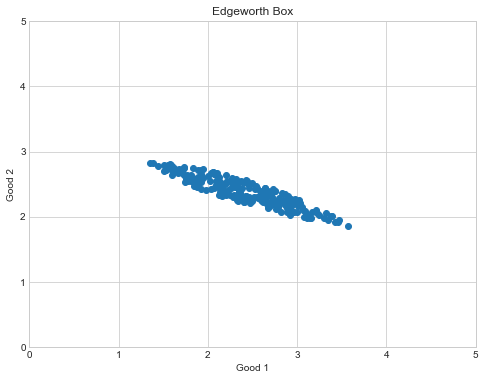

In [28]:
#Christian's Solution 
randompoint = np.random.uniform(size = 2)*5 

x1a = randompoint[0]
x1b = 5-randompoint[0]

x2a = randompoint[1]
x2b = 5-randompoint[1]

slopea = -(3/7)*(x1a/x2a)
slopeb = -(3/7)*(x1b/x2b)

util = lambda x1, x2: 0.3*np.log(x1) + 0.7*np.log(x2)

utila = util(x1a,x2a) 
utilb = util(x1b,x2b)
randompoints = np.random.uniform(size=20000)*5
randompoints.shape = (10000,2)

utila_all = util(randompoints[:,0],randompoints[:,1])
utilb_all = util(5-randompoints[:,0],5-randompoints[:,1])

pareto_improvement = (utila_all>utila) & (utilb_all>utilb) 

plt.figure(figsize = (8, 6))
plt.scatter(randompoints[pareto_improvement,0],randompoints[pareto_improvement,1])
plt.xlabel('Good 1')
plt.ylabel('Good 2')
plt.ylim(0, 5)
plt.xlim(0,5)
plt.title('Edgeworth Box')

The diagram above shows the possible points that a consumer can obtained where it maximizes both of its consumption. 

##### Problem 1d
Show that the market solution in point a. is Pareto efficient. This means that if you draw a large number of points from the Edgeworth box, you will not find a point that improves the utility of both consumer a and consumer b.

In [29]:
utila = util(2,2)
utilb = util(3,3)

randompoints = np.random.uniform(size=20000)*5
randompoints.shape = (10000,2)

utila_all = util(randompoints[:,0],randompoints[:,1])
utilb_all = util(5-randompoints[:,0],5-randompoints[:,1])

pareto_improvement= (utila_all>utila) & (utilb_all>utilb)    
print(np.sum(pareto_improvement))

0


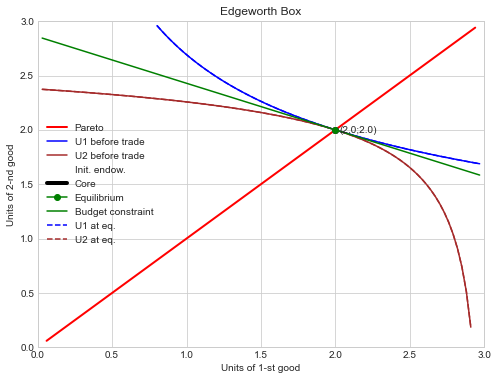

In [30]:
EB = eb.EdgeBox( u1 = lambda x,y: 0.3 * np.log(x) + 0.7*np.log(y)
              , u2 = lambda x,y: 0.3 * np.log(x) + 0.7*np.log(y)
              , IE1 = [2,2]
              , IE2 = [1,1])

plt.figure(figsize = (8, 6))
EB.plot()

The pareto optmimum is found where the two indifference curves are tangent and as well meet the budget line. I.e., at this precise point the utility for both consumers is maximized and is feasible (meaning both consumers are on a higher indifference curve).

### Problem 2: General equilibrium with production.

##### Problem 2a
In the simplest version of a general equilibrium model with production, we have one consumer, who chooses consumption and leisure (and labor supply) and a firm that buys labor and sells consumption products. Choose labor as the numeraire. We will let the firm be competetive and we let it have a simple production function: $$ f(m) = 10 \times
m $$ where $m$ is labor. The firms profit is then: $$ p \times f(m) - m $$ And the first order condition
for profit maximization is: $$ p \times 10 - 1 = 0 $$ Let leisure be given by $1-m$, and let the
consumer preferences be represented with: $$ u(c,m)= c + \frac{1}{\frac{1+1}{0.2}} \times m^{\frac{1+1}{0.2}} $$ The
consumer budget is that $ wm = pc$, but since $w = 1$, this is just $m = pc$. Implement this model. Figure out the equilibrium price, quantity produced and the equilibrium labor supply.

- First Order Conditions for equilibrium states that: The optimal quantity consumed at period 1 is given by the partial derivative of the utility function with respect to each consumer. Therefore, the FOC implies that at the optimal price $$ consumption_{1a} + consumption_{1b} - Endowment_{1a} - Endowment_{1b} = 0 $$

In [32]:
#Firm FOC from p*10 - 1 = 0
price = 0.1

#From consumer f.o.c found from the derivative of the utility function with respect to m. 
m = (1/price)**0.2

# From consumer budget
c = m/price

#firm production
cfirm = 10*m

print(f'Optimal price : {price}') 
print(f'Quantity of labour : {m}') 
print(f'Quantity of goods consumed: {c}') 
print(f"Quantity of Firm's production : {cfirm}")

Optimal price : 0.1
Quantity of labour : 1.5848931924611136
Quantity of goods consumed: 15.848931924611135
Quantity of Firm's production : 15.848931924611136


##### Problem 2b
The model in problem a. is a bit uninteresting because of the (constant-returns-to-scale) production technology that determines the price. It is fairly easy to see that $p=0.1$ directly from the profit maximization of the firm, and the rest of the solution really just follows from that. We want a richer model, let $$ f(m) = m^{0.7}$$ (We can easily think that there is some capital in the background here, right. ) Now the “problem” is that the firm will have a profit. This profit is going to “break” the model. So let the firm give the profit to the consumer. Try to implement this model.

In [39]:
def general_equilibirum2(arglist):
    
    m = arglist[0] 
    p = arglist[1] 
    
    out = np.zeros(2)
    
    out[0] = 1/p - m**(1/0.2) # f.o.c. for consumer from budget constraint
    out[1] = p*0.7*m**(-0.3) -1 # f.o.c. for firm from the derivative of the utility function
    
    return out

res = root(general_equilibirum2,np.ones(2)) #Initial guess is 1

x = res['x']
profit = x[1]*x[0]**0.7-x[0]

print(f"Labour supply: {x[0]:.3f}")
print(f"Price: {x[1]:.3f}")
print(f"Production: {x[0]**0.7:.3f}") #New production function
print(f"Consumption: {(profit+x[0])/x[1]:.3f}")
print(f"Profit: {profit:.3f}")
print("Since labour supply is approx. equal to consumption, \n then Walras' law holds i.e. we cleared the labor market in the model.")


Labour supply: 0.935
Price: 1.400
Production: 0.954
Consumption: 0.954
Profit: 0.401
Since labour supply is approx. equal to consumption, 
 then Walras' law holds i.e. we cleared the labor market in the model.


##### Problem 2c
Enter a government into the model. The government is going to need some taxes - since everything is in real terms in such a model, the government needs one unit of $c$. To finance that unit of $c$, let the government tax consumption. So government imposes a tax rate $t$. Then the price for the consumer will be $p(1+t)$, while the price for the producer will be $p$. And $t$ will need to be set so that $tc=p$ (the right hand side being the cost for the government when it needs to buy one unit of $c$). Try to implement this model and figure out the utility of the consumer in the model with government compared to the model without government. (Since the government does not do anything useful in this model, the consumer should be worse off.)

In [40]:
def general_equilibrium3(arglist):
    m = arglist[0] 
    p = arglist[1] 
    t = arglist[2] # Tax Rate
    
    out = np.zeros(3)
    
    out[0] = 1/(p+t) - m**(1/0.2) # f.o.c. for consumer from utility function
    out[1] = p*0.7*m**(-0.3) -1 # f.o.c. for firm from produciton function
    
    profit = x[1]*x[0]**0.7-x[0]
    
    c = (profit + m)/(p+t)
    
    out[2] = t*c-p # Constraint to set t so that t*c = p
    
    return out

res = root(general_equilibrium3,np.ones(3))
x = res['x']
profit = x[1]*x[0]**0.7-x[0]

print(f"Labour supply: {x[0]:.3f}")
print(f"Price: {x[1]:.3f}")
print(f"Production {x[0]**0.7:.3f}")
print(f"Consumption {(profit+x[0])/(x[1]+x[2]):.3f}")
print(f"Profit: {profit:.3f}")
print("Since the labour supply does not match with consumption, \n then Warlas' law does not hold")

Labour supply: 0.536
Price: 1.012
Production 0.646
Consumption 0.041
Profit: 0.118
Since the labour supply does not match with consumption, 
 then Warlas' law does not hold


So the numbers don't add up here, because the goverment needs more than the full production. Let us reduce the government need to 0.1 units.

In [42]:
def general_equilibrium3b(arglist):
    
    m = arglist[0] 
    p = arglist[1] 
    t = arglist[2]
    
    out = np.zeros(3)
    
    out[0] = 1/(p+t) - m**(1/0.2) # f.o.c. for consumer
    out[1] = p*0.7*m**(-0.3) -1 # f.o.c. for firm
    
    profit = p*m**0.7-m
    c = (profit + m)/(p+t)
    
    out[2] = t*c-p/10
    
    return out

res = root(general_equilibrium3b,np.ones(3))
x = res['x']
profit = x[1]*x[0]**0.7-x[0]

print(f"Labour supply: {x[0]:.3f}")
print(f"Price: {x[1]:.3f}")
print(f"Tax: {x[2]:.3f}")
print(f"Production: {x[0]**0.7:.3f}")
print(f"Profit: {profit:.3f}")
print(f"Consumption: {(profit+x[0])/(x[1]+x[2]):.3f}")


Labour supply: 0.915
Price: 1.391
Tax: 0.166
Production: 0.940
Profit: 0.392
Consumption: 0.840


So, there is some distortion in this model. The labor supply is reduced from 0.935 to 0.915 because of taxation.

In [43]:
def utility(c,m):
    return c - 1/(1+1/0.2)*m**(1+1/0.2)

print(f'Utily when consumption = 0.954 and labour = 0.935 is {utility(0.954,0.935)}')
print(f'Utily when consumption = 0.840 and labour = 0.915 is {utility(0.840,0.915)}')

Utily when consumption = 0.954 and labour = 0.935 is 0.8426427711583098
Utily when consumption = 0.840 and labour = 0.915 is 0.7421917892990391


So we see that the utility of the consumer (which is the same as the compensating variation or the equivalent variation or the consumer surplus) is falling by a tiny bit more than the government need. This is the deadweight loss of taxation.

##### Problem 2d
Improve on the model from problem (c) by letting the government size be $G$ (instead of 1 as in the model). Let the government be useful to the consumer by adding a term $G$ to the utility function. Try to figure out the utility reduction for the consumer as a function of the government size and make a plot of this.

    fjac: array([[-0.75988065, -0.08362665, -0.64466114],
       [ 0.394948  , -0.84706962, -0.35565312],
       [ 0.51633079,  0.52486154, -0.67669999]])
     fun: array([-4.90190111e-11, -1.00031095e-12,  1.32025751e-10])
 message: 'The solution converged.'
    nfev: 14
     qtf: array([-2.28479079e-08, -2.84181359e-08, -5.05983400e-08])
       r: array([ 3.60656448,  0.09316352, -0.13610338, -0.84595962, -0.38572647,
       -0.64269814])
  status: 1
 success: True
       x: array([0.91528349, 1.39113299, 0.16562768])


[]

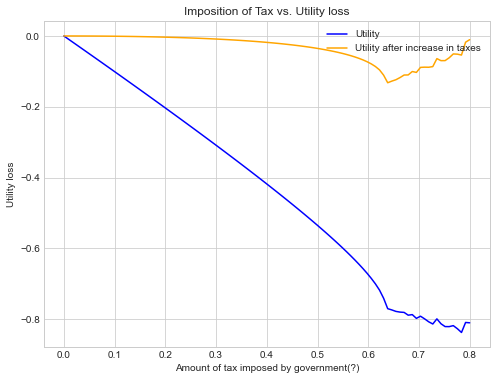

In [45]:
#So we make the equation system a function of government size.
def general_equilibrium4(dep, G):
    
    m = dep[0] 
    p = dep[1] 
    t = dep[2] 
    out = np.zeros(3)
    
    out[0] = 1/(p+t) - m**(1/0.2) # f.o.c. for consumer
    out[1] = p*0.7*m**(-0.3) -1 # f.o.c. for firm
    
    profit = p*m**0.7-m
    c = (profit + m)/(p+t)
    
    # The only change is in the equation below    
    out[2] = t*c-p*G
    
    return out

res= root(general_equilibrium4,np.ones(3),args=0.1)
print(res)

govsizes = np.linspace(0,0.8,100)
utilityloss = np.zeros(100)

for i in range(100):
    res = root(general_equilibrium4,np.ones(3),args=govsizes[i])
    x = res['x']
    profit = x[1]*x[0]**0.7-x[0]
    c = (profit+x[0])/(x[1]+x[2])
    if i== 0:
        utilityloss[i] = 0
        baseutility = utility(c,x[0])
    else:
        utilityloss[i] = utility(c,x[0])-baseutility

plt.figure(figsize = (8, 6))
plt.plot(govsizes,utilityloss, color = 'Blue', label = "Utility")
plt.plot(govsizes,utilityloss + govsizes, color = 'Orange', label = "Utility after increase in taxes")
plt.xlabel('Amount of tax imposed by government(?)')
plt.ylabel('Utility loss')
plt.title('Imposition of Tax vs. Utility loss')
plt.legend(loc = 'upper right') 
plt.plot()

So the orange line is the deadweight loss of taxation. It is very small for small taxes. It is also small in this model because the labor supply is quite inelastic.

##### Problem 2e
(Pollution and Pigou taxes.) Let the firm produce pollution r in addition to consumption goods. Let $r$ be equal to $c$ In the utility function, add a term $-0.5 \times r$, but assume that consumers do not take into account this term when choosing consumption. (This does not make sense for consumers, but: Imagine that there were 1000 identical consumers. The model would then be almost exactly the same, except that pollution would almost completely be determined by the consumption of the others. So in this context, it makes sense that the consumer disregards the
pollution when deciding upon consumption.) All in all, this means that the consumer
decision problem is exactly as before, but that when we use the utility function to measure welfare, consumers will be worse off because of pollution. Redo point d. with this model.

- Christian's comment: So this is very easy, since the pollution does not affect behavior, we can just use the same as before, we just need to adjust the utility function in the welfare assessment. We specify this so that it is production that pollutes. So pollution is given by (c + govsize)

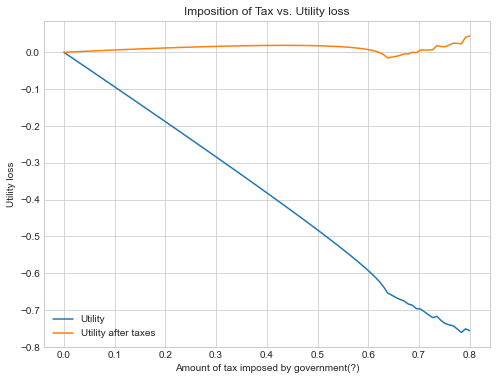

In [46]:
govsizes = np.linspace(0,0.8,100)
utilityloss = np.zeros(100)

for i in range(100):
    res = root(general_equilibrium4,np.ones(3),args=govsizes[i])
    x = res['x']
    profit = x[1]*x[0]**0.7-x[0]
    c = (profit+x[0])/(x[1]+x[2])
    
    if i==0:
        utilityloss[i] = 0
        baseutility = utility(c,x[0]) - 0.5 * (c+govsizes[i])
        
    else:
        utilityloss[i] = utility(c,x[0])- 0.5 * (c+govsizes[i]) -baseutility

        
plt.figure(figsize = (8, 6))
plt.plot(govsizes,utilityloss, label = "Utility")
plt.plot(govsizes,utilityloss+govsizes, label = "Utility after taxes")
plt.xlabel('Amount of tax imposed by government(?)')
plt.ylabel('Utility loss')
plt.title('Imposition of Tax vs. Utility loss')
plt.legend(loc = 'upper right') 
plt.legend() 
plt.show()

So we see that the deadweight loss of taxation is smallest for a tax of around 0.5.

As Christian said in class: The reason for this is that production and consumption is inititally too high. Consumers would be better off by enjoying a life with less consumption and more leisure. In this case, the tax pushes them in the right direction.